# (1) 年率換算するバージョン

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


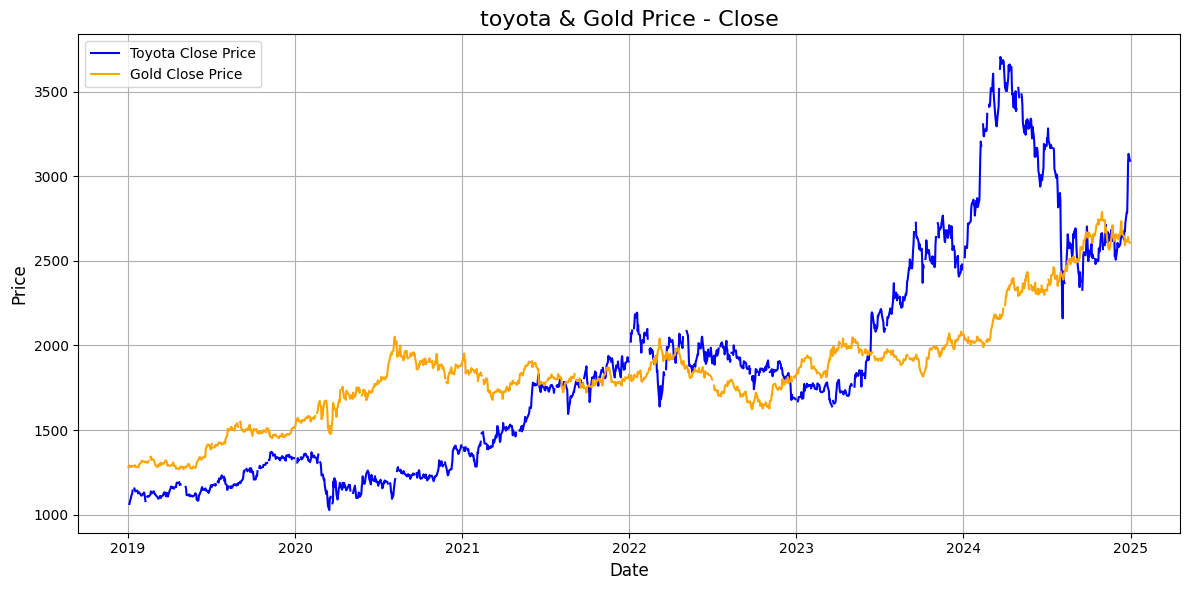

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = yf.download(['7203.T', 'GC=F'], start='2019-01-01', end='2024-12-31')['Close']
data.columns = ['Toyota', 'Gold']
data.head()

# 終値（Close）の推移をプロット
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Toyota'], label="Toyota Close Price", color='blue')
plt.plot(data.index, data['Gold'], label="Gold Close Price", color='orange')

# タイトル・ラベル
plt.title("toyota & Gold Price - Close", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True)
plt.legend()

# 表示
plt.tight_layout()
plt.show()

In [ ]:
# データ結合と日次リターン計算
returns = data.pct_change().dropna()

# 統計量計算（年率換算）
sigma_x = returns['Toyota'].std() * np.sqrt(252)  # トヨタの標準偏差
sigma_y = returns['Gold'].std() * np.sqrt(252)    # ゴールドの標準偏差
sigma_xy = returns['Toyota'].cov(returns['Gold']) * 252  # 共分散

# 最適保有比率計算
r_optimal = (sigma_y**2 - sigma_xy) / (sigma_x**2 + sigma_y**2 - 2*sigma_xy)

# 最小リスクと期待リターン計算
min_variance = r_optimal**2 * sigma_x**2 + (1-r_optimal)**2 * sigma_y**2 + 2*r_optimal*(1-r_optimal)*sigma_xy
min_risk = np.sqrt(min_variance)#分散と標準偏差は、どちらもリターンの変動幅を表す指標となるが、リターンと単位統一のため、標準偏差を使う。(分散の単位はリターンの二乗になるから)

mean_toyota = returns['Toyota'].mean() * 252
mean_gold = returns['Gold'].mean() * 252
expected_return = r_optimal * mean_toyota + (1-r_optimal) * mean_gold

# 結果表示
print("\n=== 最小分散ポートフォリオ結果 ===")
print(f"最適トヨタ保有比率: {r_optimal:.4f} ({r_optimal*100:.2f}%)")
print(f"最適ゴールド保有比率: {1-r_optimal:.4f} ({(1-r_optimal)*100:.2f}%)")
print(f"最小リスク（標準偏差）: {min_risk:.4f} ({min_risk*100:.2f}%)")
print(f"期待リターン: {expected_return:.4f} ({expected_return*100:.2f}%)")


=== 最小分散ポートフォリオ結果 ===
最適トヨタ保有比率: 0.2499 (24.99%)
最適ゴールド保有比率: 0.7501 (75.01%)
最小リスク（標準偏差）: 0.1322 (13.22%)
期待リターン: 0.1471 (14.71%)


<ipython-input-2-447797373>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


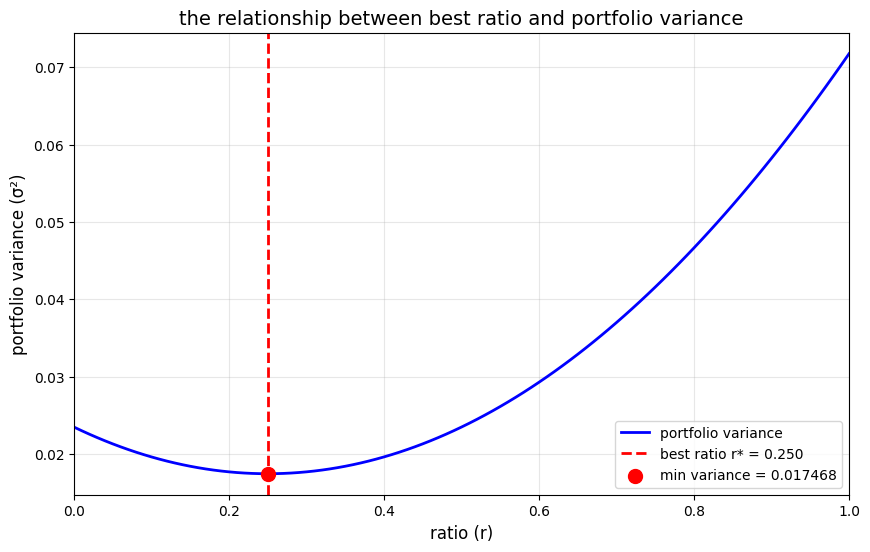

In [ ]:
# ポートフォリオ分散のグラフ作成
r_range = np.arange(0, 1.01, 0.01)
portfolio_variances = []

for r in r_range:
    variance = r**2 * sigma_x**2 + (1-r)**2 * sigma_y**2 + 2*r*(1-r)*sigma_xy
    portfolio_variances.append(variance)

# グラフ描画
plt.figure(figsize=(10, 6))
plt.plot(r_range, portfolio_variances, 'b-', linewidth=2, label='portfolio variance')
plt.axvline(x=r_optimal, color='red', linestyle='--', linewidth=2, label=f'best ratio r* = {r_optimal:.3f}')
plt.scatter([r_optimal], [min_variance], color='red', s=100, zorder=5, label=f'min variance = {min_variance:.6f}')

plt.title('the relationship between best ratio and portfolio variance', fontsize=14)
plt.xlabel('ratio (r)', fontsize=12)
plt.ylabel('portfolio variance (σ²)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.show()


# (2) 日次の標準偏差と共分散（年率換算はしない）




In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

# データ取得
data = yf.download(['7203.T', 'GC=F'], start='2019-01-01', end='2024-12-31')['Close']
data.columns = ['Toyota', 'Gold']

# 日次リターン計算
returns = data.pct_change().dropna()

# 日次の標準偏差と共分散（年率換算はしない）
sigma_x = returns['Toyota'].std()
sigma_y = returns['Gold'].std()
sigma_xy = returns['Toyota'].cov(returns['Gold'])

# 最適保有比率（年率換算のときと同じ式）
r_optimal = (sigma_y**2 - sigma_xy) / (sigma_x**2 + sigma_y**2 - 2*sigma_xy)

# 最小リスク（標準偏差）と期待リターン（どちらも日次ベース）
min_variance = r_optimal**2 * sigma_x**2 + (1-r_optimal)**2 * sigma_y**2 + 2*r_optimal*(1-r_optimal)*sigma_xy
min_risk = np.sqrt(min_variance)

mean_toyota = returns['Toyota'].mean()
mean_gold = returns['Gold'].mean()
expected_return = r_optimal * mean_toyota + (1-r_optimal) * mean_gold

# 結果表示
print("\n=== 最小分散ポートフォリオ結果（日次単位） ===")
print(f"最適トヨタ保有比率: {r_optimal:.4f} ({r_optimal*100:.2f}%)")
print(f"最適ゴールド保有比率: {1-r_optimal:.4f} ({(1-r_optimal)*100:.2f}%)")
print(f"最小リスク（標準偏差）: {min_risk:.6f} （これは日次リスク）")
print(f"期待リターン: {expected_return:.6f} （これは日次リターン）")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


=== 最小分散ポートフォリオ結果（日次単位） ===
最適トヨタ保有比率: 0.2499 (24.99%)
最適ゴールド保有比率: 0.7501 (75.01%)
最小リスク（標準偏差）: 0.008326 （これは日次リスク）
期待リターン: 0.000584 （これは日次リターン）



<ipython-input-1-2628644342>:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


# (3) トヨタ株と組み合わせするのは金ではなく、リストから

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

# トヨタ + 比較対象リスト
base_stock = '7203.T'  # Toyota
compare_stocks = {
    '9984.T': 'SoftBank Group',
    '8306.T': 'Mitsubishi UFJ',
    '6501.T': 'Hitachi'
}

# 年間取引日数
TRADING_DAYS = 252

# データ取得
symbols = [base_stock] + list(compare_stocks.keys())
data = yf.download(symbols, start='2019-01-01', end='2024-12-31')['Close']

# 結果表示
for ticker, name in compare_stocks.items():
    df = data[[base_stock, ticker]].dropna()
    df.columns = ['Toyota', name]

    # 日次リターン計算
    returns = df.pct_change().dropna()

    # 年率換算された標準偏差と共分散
    sigma_x = returns['Toyota'].std() * np.sqrt(TRADING_DAYS)
    sigma_y = returns[name].std() * np.sqrt(TRADING_DAYS)
    sigma_xy = returns['Toyota'].cov(returns[name]) * TRADING_DAYS

    # 最適保有比率（トヨタ側）
    r_optimal = (sigma_y**2 - sigma_xy) / (sigma_x**2 + sigma_y**2 - 2 * sigma_xy)

    # 最小リスクの計算（年率標準偏差）
    min_variance = (
        r_optimal**2 * sigma_x**2
        + (1 - r_optimal)**2 * sigma_y**2
        + 2 * r_optimal * (1 - r_optimal) * sigma_xy
    )
    min_risk = np.sqrt(min_variance)

    # 年率期待リターン
    mean_toyota = returns['Toyota'].mean() * TRADING_DAYS
    mean_other = returns[name].mean() * TRADING_DAYS
    expected_return = r_optimal * mean_toyota + (1 - r_optimal) * mean_other

    # 結果出力
    print(f"\n=== 最小分散ポートフォリオ結果: Toyota & {name} ===")
    print(f"最適トヨタ保有比率: {r_optimal:.4f} ({r_optimal*100:.2f}%)")
    print(f"最適{name}保有比率: {1 - r_optimal:.4f} ({(1 - r_optimal)*100:.2f}%)")
    print(f"最小リスク（標準偏差）: {min_risk:.4f} ({min_risk*100:.2f}%)")
    print(f"期待リターン: {expected_return:.4f} ({expected_return*100:.2f}%)")


[*********************100%***********************]  4 of 4 completed


=== 最小分散ポートフォリオ結果: Toyota & SoftBank Group ===
最適トヨタ保有比率: 0.8429 (84.29%)
最適SoftBank Group保有比率: 0.1571 (15.71%)
最小リスク（標準偏差）: 0.2684 (26.84%)
期待リターン: 0.2295 (22.95%)

=== 最小分散ポートフォリオ結果: Toyota & Mitsubishi UFJ ===
最適トヨタ保有比率: 0.5034 (50.34%)
最適Mitsubishi UFJ保有比率: 0.4966 (49.66%)
最小リスク（標準偏差）: 0.2439 (24.39%)
期待リターン: 0.2578 (25.78%)

=== 最小分散ポートフォリオ結果: Toyota & Hitachi ===
最適トヨタ保有比率: 0.7334 (73.34%)
最適Hitachi保有比率: 0.2666 (26.66%)
最小リスク（標準偏差）: 0.2651 (26.51%)
期待リターン: 0.2722 (27.22%)
